In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Importing Data and EDA

In [2]:
df = pd.read_csv('cancer_classification.csv')
pd.set_option('display.max_columns', 50)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

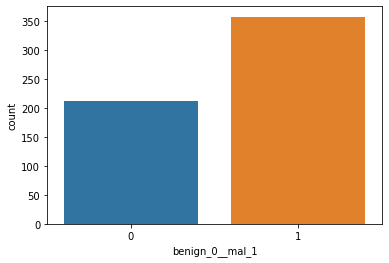

In [7]:
sns.countplot('benign_0__mal_1', data = df)

<AxesSubplot:>

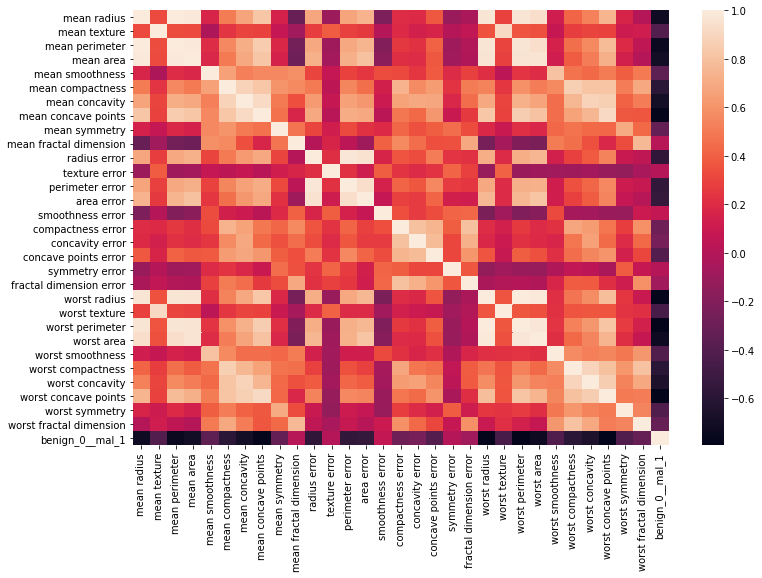

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr())

<AxesSubplot:>

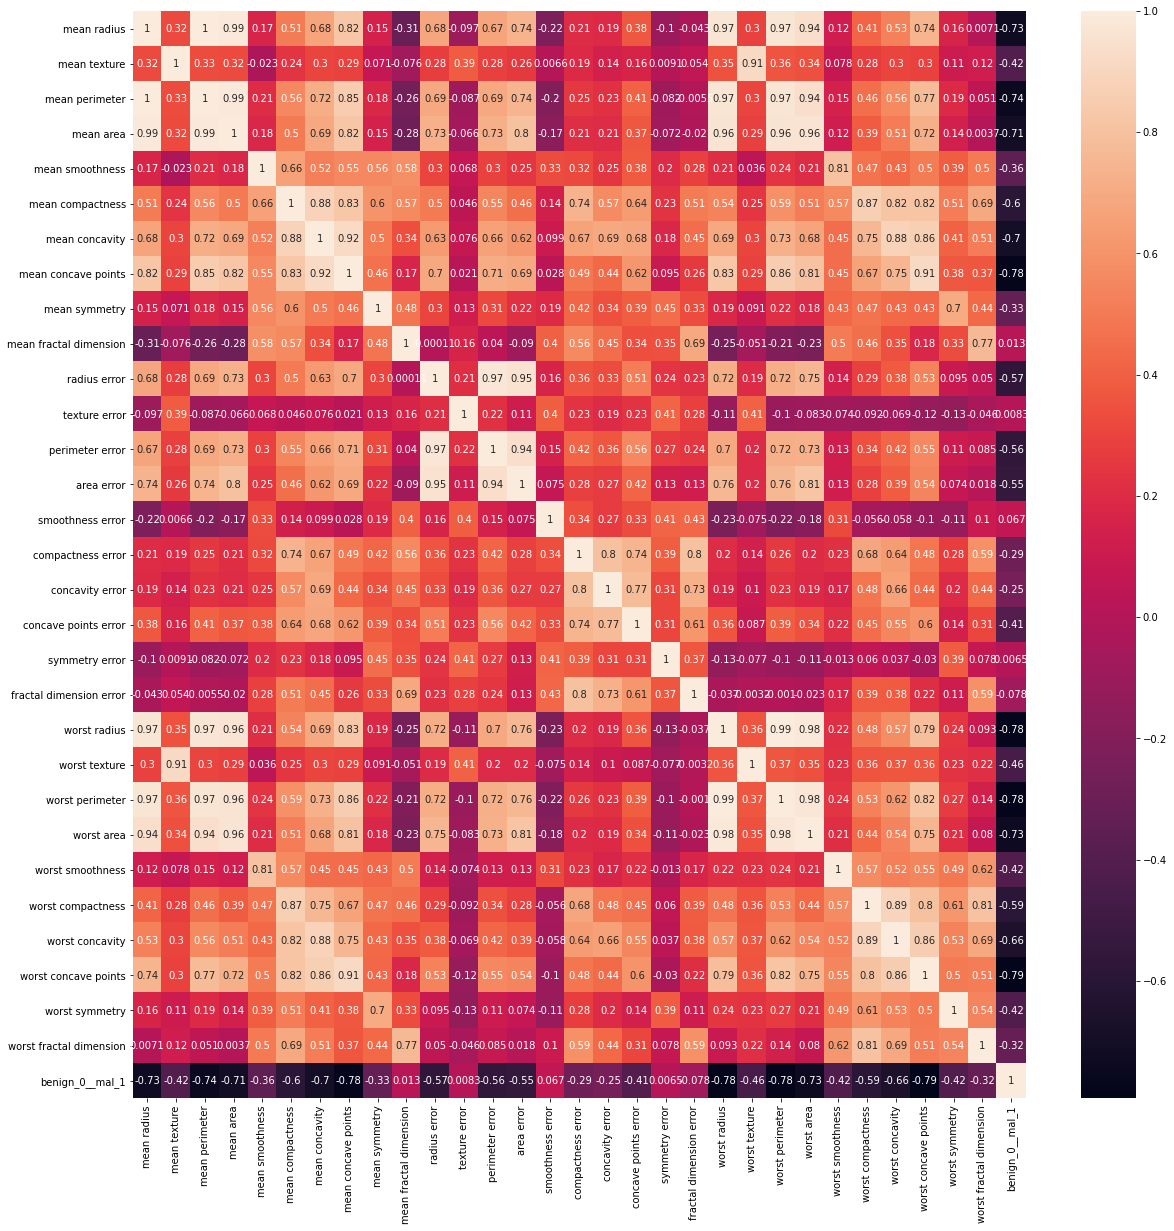

In [10]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

We will drop highly correlated features.

In [12]:
drop_list = ['worst perimeter', 'worst area', 'perimeter error', 'area error', 'mean perimeter', 'mean area']

In [13]:
df = df.drop(drop_list, axis = 1)

In [14]:
df.shape

(569, 25)

In [17]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending = False)

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean radius               -0.730029
worst radius              -0.776454
mean concave points       -0.776614
worst concave points      -0.793566
Name: benign_0__mal_1, dtype: float64

## Split and Scale Data

In [18]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [23]:
X_train.shape

(426, 24)

In [24]:
model = Sequential()

model.add(Dense(24, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600)

Epoch 1/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6788 - accuracy: 0.6127 - val_loss: 0.6580 - val_accuracy: 0.6224
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6197 - val_loss: 0.6296 - val_accuracy: 0.6434
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.6643 - val_loss: 0.5948 - val_accuracy: 0.7273
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7488 - val_loss: 0.5536 - val_accuracy: 0.7692
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.8568 - val_loss: 0.5027 - val_accuracy: 0.8811
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8873 - val_loss: 0.4442 - val_accuracy: 0.9301
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8944 - val_loss: 0.3879 - val_accuracy: 0.9231
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0666 - accuracy: 0.9812 - val_loss: 0.0671 - val_accuracy: 0.9720
Epoch 60/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9812 - val_loss: 0.0665 - val_accuracy: 0.9720
Epoch 61/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0654 - accuracy: 0.9859 - val_loss: 0.0657 - val_accuracy: 0.9790
Epoch 62/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0647 - accuracy: 0.9742 - val_loss: 0.0673 - val_accuracy: 0.9790
Epoch 63/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.9789 - val_loss: 0.0657 - val_accuracy: 0.9720
Epoch 64/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0650 - val_accuracy: 0.9720
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9836 - val_loss: 0.0634 - val_accuracy: 0.9790
Epoch 

14/14 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 0.9883 - val_loss: 0.0549 - val_accuracy: 0.9790
Epoch 117/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.0632 - val_accuracy: 0.9720
Epoch 118/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9883 - val_loss: 0.0543 - val_accuracy: 0.9790
Epoch 119/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0448 - accuracy: 0.9836 - val_loss: 0.0593 - val_accuracy: 0.9720
Epoch 120/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9883 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 121/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0462 - accuracy: 0.9883 - val_loss: 0.0569 - val_accuracy: 0.9790
Epoch 122/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0579 - val_accuracy: 0.9790
Epoch 123/600

14/14 [==============================] - 0s 6ms/step - loss: 0.0408 - accuracy: 0.9859 - val_loss: 0.0559 - val_accuracy: 0.9790
Epoch 174/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9836 - val_loss: 0.0598 - val_accuracy: 0.9720
Epoch 175/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0552 - val_accuracy: 0.9790
Epoch 176/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 0.9859 - val_loss: 0.0553 - val_accuracy: 0.9790
Epoch 177/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0549 - val_accuracy: 0.9790
Epoch 178/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0376 - accuracy: 0.9859 - val_loss: 0.0586 - val_accuracy: 0.9790
Epoch 179/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9906 - val_loss: 0.0543 - val_accuracy: 0.9790
Epoch 180/600

14/14 [==============================] - 0s 11ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 231/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0336 - accuracy: 0.9883 - val_loss: 0.0543 - val_accuracy: 0.9930
Epoch 232/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0329 - accuracy: 0.9859 - val_loss: 0.0583 - val_accuracy: 0.9790
Epoch 233/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0531 - val_accuracy: 0.9930
Epoch 234/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 0.0546 - val_accuracy: 0.9930
Epoch 235/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0376 - accuracy: 0.9836 - val_loss: 0.0562 - val_accuracy: 0.9930
Epoch 236/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.9883 - val_loss: 0.0614 - val_accuracy: 0.9720
Epoch 2

14/14 [==============================] - 0s 14ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0582 - val_accuracy: 0.9860
Epoch 288/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 0.9883 - val_loss: 0.0570 - val_accuracy: 0.9860
Epoch 289/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9883 - val_loss: 0.0582 - val_accuracy: 0.9860
Epoch 290/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0592 - val_accuracy: 0.9860
Epoch 291/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9906 - val_loss: 0.0541 - val_accuracy: 0.9860
Epoch 292/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0522 - val_accuracy: 0.9930
Epoch 293/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0279 - accuracy: 0.9883 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 294/60

14/14 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.9906 - val_loss: 0.0572 - val_accuracy: 0.9860
Epoch 345/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9906 - val_loss: 0.0554 - val_accuracy: 0.9860
Epoch 346/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9906 - val_loss: 0.0548 - val_accuracy: 0.9860
Epoch 347/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9906 - val_loss: 0.0557 - val_accuracy: 0.9860
Epoch 348/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0602 - val_accuracy: 0.9860
Epoch 349/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.9906 - val_loss: 0.0544 - val_accuracy: 0.9860
Epoch 350/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0260 - accuracy: 0.9883 - val_loss: 0.0634 - val_accuracy: 0.9790
Epoch 351/600

14/14 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0552 - val_accuracy: 0.9860
Epoch 402/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 0.0632 - val_accuracy: 0.9790
Epoch 403/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0567 - val_accuracy: 0.9860
Epoch 404/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0204 - accuracy: 0.9906 - val_loss: 0.0547 - val_accuracy: 0.9860
Epoch 405/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9883 - val_loss: 0.0540 - val_accuracy: 0.9860
Epoch 406/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9930 - val_loss: 0.0633 - val_accuracy: 0.9860
Epoch 407/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.9953 - val_loss: 0.0560 - val_accuracy: 0.9860
Epoch 408/60

14/14 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0579 - val_accuracy: 0.9860
Epoch 459/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0150 - accuracy: 0.9977 - val_loss: 0.0613 - val_accuracy: 0.9860
Epoch 460/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 0.9977 - val_loss: 0.0570 - val_accuracy: 0.9860
Epoch 461/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0585 - val_accuracy: 0.9860
Epoch 462/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9860
Epoch 463/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0600 - val_accuracy: 0.9860
Epoch 464/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0567 - val_accuracy: 0.9860
Epoch 465/600

14/14 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0592 - val_accuracy: 0.9860
Epoch 516/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 0.9977 - val_loss: 0.0581 - val_accuracy: 0.9860
Epoch 517/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.0600 - val_accuracy: 0.9860
Epoch 518/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.0580 - val_accuracy: 0.9860
Epoch 519/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0114 - accuracy: 0.9953 - val_loss: 0.0609 - val_accuracy: 0.9860
Epoch 520/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.0585 - val_accuracy: 0.9860
Epoch 521/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.0589 - val_accuracy: 0.9860
Epoch 522/600

14/14 [==============================] - 0s 6ms/step - loss: 0.0130 - accuracy: 0.9953 - val_loss: 0.0596 - val_accuracy: 0.9860
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9860
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0611 - val_accuracy: 0.9860
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9953 - val_loss: 0.0588 - val_accuracy: 0.9860
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9953 - val_loss: 0.0627 - val_accuracy: 0.9860
Epoch 578/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9860
Epoch 579/600

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

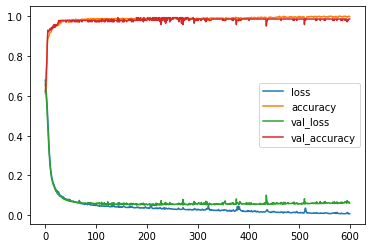

In [27]:
losses.plot()

### Early Stopping

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

model.add(Dense(24, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 15)

In [31]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600, callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.5915 - val_loss: 0.6692 - val_accuracy: 0.6294
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6315 - val_loss: 0.6401 - val_accuracy: 0.6434
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6714 - val_loss: 0.6091 - val_accuracy: 0.6923
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.7230 - val_loss: 0.5755 - val_accuracy: 0.7832
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.8216 - val_loss: 0.5410 - val_accuracy: 0.8252
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5165 - accuracy: 0.8357 - val_loss: 0.5005 - val_accuracy: 0.8392
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.8592 - val_loss: 0.4608 - val_accuracy: 0.8881
Epoch 8/600
1

Epoch 59/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0688 - accuracy: 0.9812 - val_loss: 0.0709 - val_accuracy: 0.9860
Epoch 60/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0730 - val_accuracy: 0.9790
Epoch 61/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0668 - accuracy: 0.9765 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 62/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0659 - accuracy: 0.9765 - val_loss: 0.0688 - val_accuracy: 0.9860
Epoch 63/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0654 - accuracy: 0.9765 - val_loss: 0.0697 - val_accuracy: 0.9790
Epoch 64/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0650 - accuracy: 0.9765 - val_loss: 0.0738 - val_accuracy: 0.9720
Epoch 65/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 0.9765 - val_loss: 0.0668 - val_accuracy: 0.9860
Epoch 

14/14 [==============================] - 0s 7ms/step - loss: 0.0492 - accuracy: 0.9812 - val_loss: 0.0565 - val_accuracy: 0.9930
Epoch 117/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0493 - accuracy: 0.9859 - val_loss: 0.0565 - val_accuracy: 0.9860
Epoch 118/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.0586 - val_accuracy: 0.9790
Epoch 119/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0581 - val_accuracy: 0.9790
Epoch 120/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0554 - val_accuracy: 0.9930
Epoch 121/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0588 - val_accuracy: 0.9790
Epoch 122/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0485 - accuracy: 0.9812 - val_loss: 0.0611 - val_accuracy: 0.9790
Epoch 123/600

<AxesSubplot:>

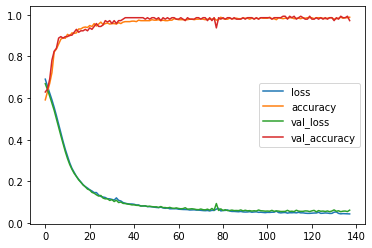

In [32]:
losses = pd.DataFrame(model.history.history)

losses.plot()

### Dropout Layers

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600,
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6817 - accuracy: 0.5634 - val_loss: 0.6547 - val_accuracy: 0.7902
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6459 - accuracy: 0.6948 - val_loss: 0.6290 - val_accuracy: 0.8741
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.7254 - val_loss: 0.5971 - val_accuracy: 0.9021
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5934 - accuracy: 0.7934 - val_loss: 0.5627 - val_accuracy: 0.8951
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.8028 - val_loss: 0.5202 - val_accuracy: 0.8881
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5258 - accuracy: 0.8404 - val_loss: 0.4701 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.8685 - val_loss: 0.4264 - val_accuracy: 0.9161
Epoch 8/600


Epoch 59/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9577 - val_loss: 0.0721 - val_accuracy: 0.9790
Epoch 60/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9577 - val_loss: 0.0805 - val_accuracy: 0.9720
Epoch 61/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9554 - val_loss: 0.0694 - val_accuracy: 0.9790
Epoch 62/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9718 - val_loss: 0.0786 - val_accuracy: 0.9720
Epoch 63/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0957 - accuracy: 0.9718 - val_loss: 0.0667 - val_accuracy: 0.9860
Epoch 64/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9648 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 65/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9554 - val_loss: 0.0710 - val_accuracy: 0.9790
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9836 - val_loss: 0.0603 - val_accuracy: 0.9790
Epoch 117/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9718 - val_loss: 0.0516 - val_accuracy: 0.9790
Epoch 118/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9765 - val_loss: 0.0501 - val_accuracy: 0.9790
Epoch 119/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.0525 - val_accuracy: 0.9790
Epoch 120/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9718 - val_loss: 0.0542 - val_accuracy: 0.9790
Epoch 121/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9765 - val_loss: 0.0523 - val_accuracy: 0.9790
Epoch 122/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9765 - val_loss: 0.0576 - val_accuracy: 0.9790
Epoch 123/600

<AxesSubplot:>

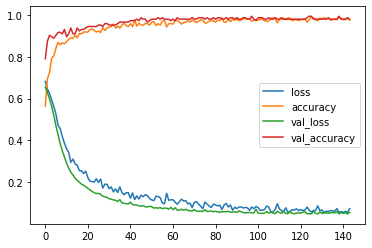

In [36]:
losses = pd.DataFrame(model.history.history)

losses.plot()

## Model Evaluation

In [37]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [41]:
print(confusion_matrix(y_test, predictions))

[[52  1]
 [ 2 88]]


## Making Predictions

In [42]:
df.shape

(569, 25)

In [43]:
df.iloc[0]

mean radius                17.990000
mean texture               10.380000
mean smoothness             0.118400
mean compactness            0.277600
mean concavity              0.300100
mean concave points         0.147100
mean symmetry               0.241900
mean fractal dimension      0.078710
radius error                1.095000
texture error               0.905300
smoothness error            0.006399
compactness error           0.049040
concavity error             0.053730
concave points error        0.015870
symmetry error              0.030030
fractal dimension error     0.006193
worst radius               25.380000
worst texture              17.330000
worst smoothness            0.162200
worst compactness           0.665600
worst concavity             0.711900
worst concave points        0.265400
worst symmetry              0.460100
worst fractal dimension     0.118900
benign_0__mal_1             0.000000
Name: 0, dtype: float64

In [55]:
new_data = df.iloc[0][:-1]

In [47]:
new_data.shape

(24,)

In [48]:
new_data.ndim

1

In [49]:
X_train.ndim

2

In [50]:
X_train.shape

(426, 24)

In [56]:
new_data = scaler.transform(new_data.values.reshape(-1, 24))

In [57]:
new_data.shape

(1, 24)

In [59]:
model.predict_classes(new_data)

array([[0]], dtype=int32)